In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, Input 

In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9HZM08/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9HZM08/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete9HZM08/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, padded_shapes=None)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, padded_shapes=None)

In [16]:
EMBEDDING_DIM = 128

class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.embedding = Embedding(tokenizer.vocab_size, EMBEDDING_DIM)
    self.lstm1 = Bidirectional(LSTM(128, return_sequences=True))
    self.lstm2 = Bidirectional(LSTM(64))
    self.fc1 = Dense(128, activation='relu')
    self.fc2 = Dense(1, activation='sigmoid')
  
  def call(self, x):
    x = self.embedding(x)
    x = self.lstm1(x)
    x = self.lstm2(x)
    x = self.fc1(x)
    x = self.fc2(x)
    return x
    
  def model(self):
    x = Input([None])
    return tf.keras.Model(inputs=[x], outputs=self.call(x))

In [17]:
model = MyModel()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.model().summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 128)         1047680   
_________________________________________________________________
bidirectional_6 (Bidirection (None, None, 256)         263168    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 1,491,841
Trainable params: 1,491,841
Non-trainable params: 0
____________________________________________

In [18]:
num_epochs = 10

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 140s 359ms/step - loss: 0.6458 - accuracy: 0.6167 - val_loss: 0.5783 - val_accuracy: 0.7143
Epoch 2/10
391/391 [==============================] - 139s 357ms/step - loss: 0.3873 - accuracy: 0.8314 - val_loss: 0.3442 - val_accuracy: 0.8528
Epoch 3/10
391/391 [==============================] - 140s 358ms/step - loss: 0.2438 - accuracy: 0.9036 - val_loss: 0.3295 - val_accuracy: 0.8640
Epoch 4/10
391/391 [==============================] - 140s 359ms/step - loss: 0.1791 - accuracy: 0.9325 - val_loss: 0.3056 - val_accuracy: 0.8808
Epoch 5/10
391/391 [==============================] - 140s 358ms/step - loss: 0.1249 - accuracy: 0.9567 - val_loss: 0.3238 - val_accuracy: 0.8761
Epoch 6/10
391/391 [==============================] - 139s 356ms/step - loss: 0.0798 - accuracy: 0.9755 - val_loss: 0.3710 - val_accuracy: 0.8743
Epoch 7/10
391/391 [==============================] - 141s 359ms/step - loss: 0.0619 - accuracy: 0.9818 - val_loss: 0.4656 -

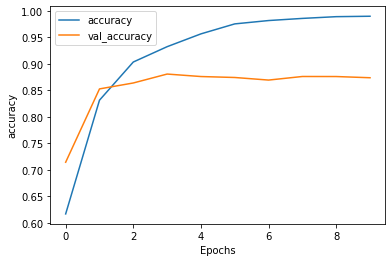

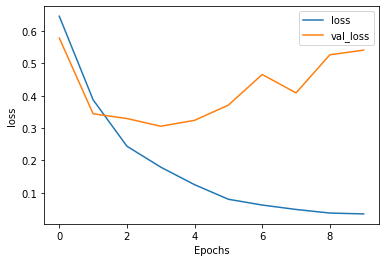

In [19]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')